In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

In [20]:
batch_size=4

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

trainset = torchvision.datasets.MNIST(root='/mnt/t-achetan/datasets/', train=False,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)


In [22]:
type(trainset.class_to_idx)

dict

In [3]:
from torch.utils.data import Subset, DataLoader

In [12]:
use_idx

(array([   2,    5,   14, ..., 9984, 9991, 9994]),)

In [4]:
use_idx = np.where(np.isin(trainset.targets, [1, 8]) == True)
x = Subset(trainset, use_idx)
x

In [7]:
vars(x)

{'dataset': Dataset MNIST
     Number of datapoints: 10000
     Root location: /mnt/t-achetan/datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 'indices': (array([   2,    5,   14, ..., 9984, 9991, 9994]),)}

In [9]:
dl = DataLoader(x, shuffle=False, batch_size=8)

for idx, (X, y) in enumerate(dl):
    print(X.shape, y.shape)
    plt.imshow(X[0].reshape(28, 28))
    break

ValueError: only one element tensors can be converted to Python scalars

In [11]:
next(iter(dl))

ValueError: only one element tensors can be converted to Python scalars

In [13]:
np.unique(trainset.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

AttributeError: 'Subset' object has no attribute 'targets'

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.imshow(torchvision.utils.make_grid(images, nrow=4).reshape(-1, 122))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [ ]:
import pycuda.autoinit
import numpy as np
import pycuda.gpuarray as gpuarray
import skcuda.linalg as linalg
from skcuda.linalg import PCA as cuPCA
from sklearn.decomposition import PCA

In [ ]:
X = np.random.rand(1000, 1000)

In [ ]:
b

In [ ]:
trainset_all = torch.zeros(60000, 784)
trainset_labels_all = torch.zeros(60000)
for i in range(len(trainset)):
    trainset_all[i] = trainset[i][0].reshape(-1)
    trainset_labels_all[i] = trainset[i][1]

In [ ]:
a = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
b = np.array([0, 1, 2])


In [ ]:
a[np.arange(3), b] = 1
a

In [ ]:
a[np.arange(3), ~b] = 2
a

In [ ]:
~b

In [ ]:
a = np.array([1, 2, 3, 4])
np.where(a == [1, 2, 5, 7])

In [ ]:
a[np.isin(a, [1, 2, 5, 7])]

# Testing the MNIST dataset

In [9]:
import os
os.chdir("/data/t-achetan/adv_geom/src/")
import numpy as np
from datagen.real.mnist import MNISTManifolds

In [2]:
cfg_dict = MNISTManifolds.get_demo_cfg_dict()
cfg_dict["train"]["num_neg"] = 2
cfg_dict["train"]["on_mfld_path"] = "/mnt/t-achetan/datasets/"
cfg_dict["val"]["num_neg"] = 2
cfg_dict["val"]["on_mfld_path"] = "/mnt/t-achetan/datasets/"
cfg_dict["test"]["num_neg"] = 2
cfg_dict["test"]["on_mfld_path"] = "/mnt/t-achetan/datasets/"
cfg_dict

{'strategy': 'only',
 'has_val': False,
 'train': {'on_mfld_path': '/mnt/t-achetan/datasets/',
  'k': 25,
  'n': 784,
  'use_labels': [1, 8],
  'off_mfld_label': 9,
  'split': 'train',
  'seed': 23,
  'num_neg': 2,
  'nn': 50,
  'buf_nn': 2,
  'max_t_delta': 0.001,
  'max_norm': 0.1,
  'M': 1.0,
  'transform': None},
 'val': {'on_mfld_path': '/mnt/t-achetan/datasets/',
  'k': 25,
  'n': 784,
  'use_labels': [1, 8],
  'off_mfld_label': 9,
  'split': 'test',
  'seed': 23,
  'num_neg': 2,
  'nn': 50,
  'buf_nn': 2,
  'max_t_delta': 0.001,
  'max_norm': 0.1,
  'M': 1.0,
  'transform': None},
 'test': {'on_mfld_path': '/mnt/t-achetan/datasets/',
  'k': 25,
  'n': 784,
  'use_labels': [1, 8],
  'off_mfld_label': 9,
  'split': 'test',
  'seed': 23,
  'num_neg': 2,
  'nn': 50,
  'buf_nn': 2,
  'max_t_delta': 0.001,
  'max_norm': 0.1,
  'M': 1.0,
  'transform': None}}

In [3]:
# trainset, valset, testset = MNISTManifolds.make_train_val_test_splits(cfg_dict)
# MNISTManifolds.save_splits(trainset, valset, testset, "/mnt/tmp/")

In [4]:
# trainset, valset, testset = MNISTManifolds.load_splits("/mnt/tmp/")

In [5]:
trainset = MNISTManifolds(**cfg_dict["train"])
trainset.compute_points()

07-06-2022 16:10:41 -- [I] root | [mnist.py:89 -     load_raw_om_data()] >> [MNISTManifolds]: loading MNIST dataset
07-06-2022 16:10:41 -- [I] root | [mnist.py:92 -     load_raw_om_data()] >> [MNISTManifolds]: MNIST data loaded
flattening data: 8it [00:01,  4.58it/s]
07-06-2022 16:10:43 -- [I] root | [manifolds.py:452 -       compute_points()] >> [MNISTManifolds]: initialised on-mfld points
07-06-2022 16:10:43 -- [I] root | [manifolds.py:456 -       compute_points()] >> [MNISTManifolds]: created poca idx
07-06-2022 16:10:43 -- [I] root | [manifolds.py:312 - make_inferred_off_mfld()] >> [MNISTManifolds]: knn not computed. computing now ...
07-06-2022 16:10:43 -- [I] root | [manifolds.py:279 -             find_knn()] >> [MNISTManifolds]: fitting knn...
07-06-2022 16:10:46 -- [I] root | [manifolds.py:281 -             find_knn()] >> [MNISTManifolds]: knn fit done
07-06-2022 16:10:46 -- [I] root | [manifolds.py:283 -             find_knn()] >> [MNISTManifolds]: predicting nbhrs...
07-06-20

In [8]:
hasattr(trainset, "use_labels")

True

In [13]:
trainset._num_offmfld_by_class, trainset.use_labels

([500, 500], array([1, 8]))

In [6]:
trainset.poca_idx_counts.shape, trainset.uniq_poca_idx.shape, trainset.

((962,), (962,))

## Computing statistics for distance values in MNIST

In [62]:
nn_distances = trainset.nn_distances[trainset.nn_indices != np.arange(trainset.nn_indices.shape[0]).reshape(-1, 1)].reshape(trainset.nn_indices.shape[0], trainset.nn_indices.shape[1] - 1)


In [63]:
pct_pts = [10, 25, 50, 75, 100]

percentiles = np.percentile(nn_distances, pct_pts, axis=1)
np.mean(nn_distances * (nn_distances <= percentiles[1].reshape(-1, 1)).reshape(nn_distances.shape[0], -1), axis=1)

array([10.553448, 14.487647, 11.007832, ..., 30.253448, 76.61078 ,
       83.83373 ], dtype=float32)

In [153]:
classes = [8]
pct_pts = [5, 10, 25, 50, 75, 100]

mean_distances = {i: None for i in pct_pts}
nn_distances_select = nn_distances[np.isin(trainset.class_labels[trainset.num_neg:], classes)]
percentiles = np.percentile(nn_distances_select, pct_pts, axis=1)

for j in range(len(pct_pts)):
    mean_distances[pct_pts[j]] = np.mean(nn_distances_select * (nn_distances_select <= percentiles[j].reshape(-1, 1)).reshape(nn_distances_select.shape[0], -1), axis=1)

mean_distances


{5: array([12.286715, 13.145173, 13.315759, ..., 12.239066, 15.42417 ,
        13.576509], dtype=float32),
 10: array([26.100088, 28.25505 , 27.379858, ..., 26.444298, 32.651142,
        33.09962 ], dtype=float32),
 25: array([62.342834, 69.346054, 64.07201 , ..., 65.25625 , 76.61078 ,
        83.83373 ], dtype=float32),
 50: array([135.64714, 151.28177, 138.46385, ..., 149.1899 , 166.62651,
        186.67223], dtype=float32),
 75: array([207.41727, 233.46695, 209.83006, ..., 231.87848, 254.16325,
        287.53897], dtype=float32),
 100: array([289.63794, 331.1197 , 289.8682 , ..., 325.1279 , 353.07828,
        404.34885], dtype=float32)}

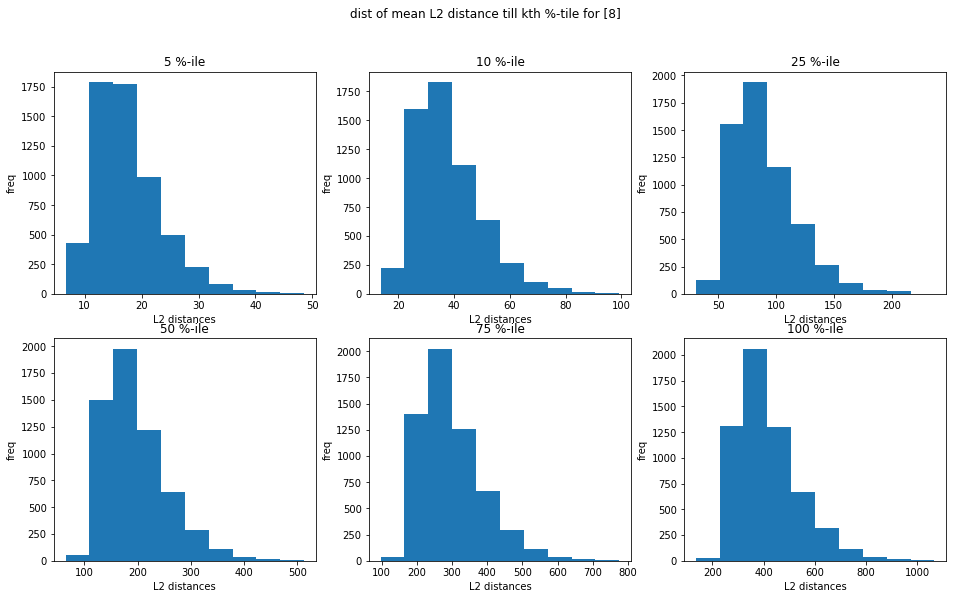

In [154]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
row=0
col=0
for i in pct_pts:
    
    ax = axs[row][col] 
    ax.hist(mean_distances[i])
    ax.set_xlabel("L2 distances")
    ax.set_ylabel("freq")
    ax.set_title("{} %-ile".format(i, classes))
    col+=1
    if col == 3:
        row+=1
        col=0
fig.suptitle("dist of mean L2 distance till kth %-tile for {}".format(classes))
plt.show()
plt.close()

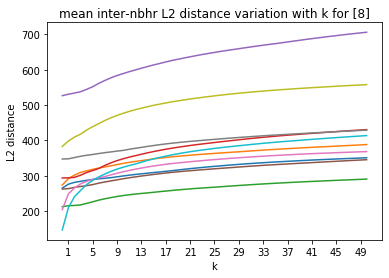

In [156]:
idx = np.random.choice(np.arange(nn_distances_select.shape[0]), size=10)
cum_mean_distances = np.cumsum(nn_distances_select, axis=1) / np.arange(1, 52)
for i in idx:
    plt.plot(cum_mean_distances[i])
plt.xlabel("k")
# plt.gca().set_yscale('log')
plt.xticks(np.arange(1, 52, step=4))
plt.ylabel("L2 distance")
plt.title("mean inter-nbhr L2 distance variation with k for {}".format(classes))
plt.show()

In [164]:
trainset.nn_distances

array([[2.5634766e-03, 2.8524597e+01, 3.0387573e+01, ..., 7.6399963e+01,
        7.7316589e+01, 7.7611847e+01],
       [5.6152344e-03, 4.9597595e+01, 5.1226746e+01, ..., 8.8850159e+01,
        8.8906494e+01, 8.9016663e+01],
       [0.0000000e+00, 2.9853668e+01, 3.3997955e+01, ..., 6.4459015e+01,
        6.4593323e+01, 6.4639160e+01],
       ...,
       [0.0000000e+00, 9.1756897e+01, 1.0573694e+02, ..., 1.7228217e+02,
        1.7292606e+02, 1.7298224e+02],
       [9.1552734e-03, 2.3791571e+02, 2.6690790e+02, ..., 3.9345813e+02,
        3.9535736e+02, 3.9614148e+02],
       [4.1503906e-03, 1.7616827e+02, 2.2532404e+02, ..., 4.6952606e+02,
        4.7049255e+02, 4.7070984e+02]], dtype=float32)

In [159]:
trainset.nn_indices

array([[    0,     5,  1820, ...,  9108,  1740,  4691],
       [    1,  6201,  4392, ...,  8878,   487,  1961],
       [    2, 10830, 10876, ...,  7053,  4196,  6644],
       ...,
       [12590,  5028,  8769, ...,  6304,   904, 12260],
       [12591,   356,    18, ..., 10557,  9349, 10731],
       [12592,  5077, 10978, ...,  7486,  7500,  5102]])

In [165]:
np.linalg.norm(trainset.all_points[0] - trainset.all_points[5], 2)

25.131271

In [16]:
trainset.all_actual_distances[:10], trainset.class_idx[:10], trainset.class_labels[:10], trainset.pre_class_labels[:10]

(array([[0.06698781, 1.        ],
        [1.        , 0.0960109 ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [1.        , 0.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [1.        , 0.        ]]),
 array([2, 2, 0, 0, 0, 0, 1, 0, 0, 1]),
 array([9, 9, 1, 1, 1, 1, 8, 1, 1, 8]),
 array([1, 8, 1, 1, 1, 1, 8, 1, 1, 8]))

tensor(0.0670, dtype=torch.float64)


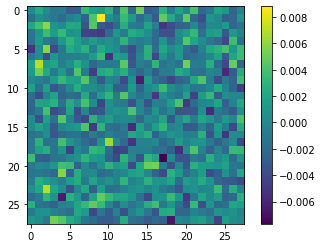

In [13]:
import torch
idx = 0
diff = trainset.all_points[idx] - trainset.on_mfld_pts[trainset.poca_idx[idx]]
print(torch.norm(diff, p=2))
plt.imshow(diff.reshape(28, 28))
plt.colorbar()

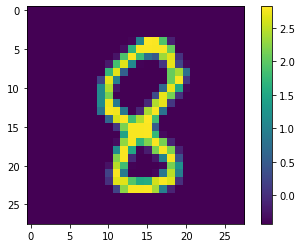

In [12]:
plt.imshow(trainset.on_mfld_pts[trainset.poca_idx[1]].reshape(28, 28))
plt.colorbar()

In [50]:
plt.imshow()

(array([ 1084, 10514]), array([1, 1]))

In [18]:
trainset.all_actual_distances[0], trainset.class_idx[0], trainset.class_labels[0], trainset.pre_class_labels[0]

(array([0.06698781, 1.        ]), 2, 9, 1)

In [10]:
trainset.on_mfld_pts.shape

torch.Size([12593, 784])

In [14]:
import torchvision
torchvision.datasets.MNIST("/mnt/t-achetan/datasets/",\
             train=True, download=False)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /mnt/t-achetan/datasets/
    Split: Train

In [6]:
import numpy as np
import torch
np.array(torch.Tensor([1, 2, 3]))

array([1., 2., 3.], dtype=float32)

In [3]:
vars(trainset)

{'root': '/mnt/t-achetan/datasets/',
 'transform': Compose(
     ToTensor()
     Normalize(mean=(0.1307,), std=(0.3081,))
 ),
 'target_transform': None,
 'transforms': StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 'train': False,
 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
      

In [10]:
trainset.targets[np.isin(trainset.targets, [1, 2])]

tensor([2, 1, 1,  ..., 2, 1, 2])

In [5]:
np.isin(trainset.targets, [1, 2])

array([False,  True,  True, ..., False, False, False])

In [5]:
import numpy as np
a= np.array([[1, 2], [3, 4], [5, 6]])
a[np.arange(3), np.array([0, 1, 0])] = 0
a

array([[0, 2],
       [3, 0],
       [0, 6]])

In [7]:
a = np.array([1, 2, 3])
b = np.array([1, 2])
(b[:, None] == a).argmax(axis=0)

array([0, 1, 0])

In [9]:
from torch.utils.data import DataLoader
dl = DataLoader(trainset, batch_size=4096, shuffle=False, num_workers=8)


In [10]:
hasattr(dl.dataset, "use_labels")

True

In [95]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
a[a > 3]

array([4, 5, 6, 7, 8])